Script Práctica 2 Parte 1 (MLP clasificación)

Redes de Neuronas Artificiales, curso 2022-2023

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt

Para trabajar con un repositorio almacenado en drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#!ls
#%cd "/content/drive/MyDrive/RN/Practica1/parte1"
#!ls

Mounted at /content/drive/


# Cargar los datos

* Hay que ajustar el path a los csv de datos 
* Cambiar parámetros correspondientes si el delimitador no es una coma, o si el archivo contiene cabeceras
* Pueden cargarse numpy arrays o dataframes, en este caso se van a utilizar arrays

In [ ]:
path = "/content/"
inputFilename = "datos.csv"
Data_set = pd.read_csv(path+inputFilename, header='infer', delimiter=',')
# SEPARACIÓN ENTRADA Y SALIDA
y_Data_set = Data_set.iloc[:,-1:]
X_Data_set = Data_set.iloc[: , :-1]
# mediante prints es posible COMPROBAR DIMENSIONES DE LOS DATOS para comprobar que todo se haya cargado correctamente
print('Entrada(X_Data_set): ', X_Data_set.shape)
print('Salida(y_Data_set): ', y_Data_set.shape)

Entrada(X_Data_set):  (2126, 21)
Salida(y_Data_set):  (2126, 1)


# Preparación de datos

In [ ]:
# Es posible usar funciones ya hechas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# SEPARACIÓN ENTRADA Y SALIDAA
y_Data_set = Data_set.iloc[:,-1:]
X_Data_set = Data_set.iloc[: , :-1]

#NORMALIZAR ENTRADAS
from sklearn.preprocessing import MinMaxScaler

# transform data
columnNames = X_Data_set.columns
scaler = MinMaxScaler()
X_Data_set_norma = scaler.fit_transform(X_Data_set)
X_Data_set_norma = pd.DataFrame(X_Data_set_norma, columns=columnNames)

#Dividir los datos en train y test de modo estratificado 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Data_set_norma, y_Data_set, stratify=y_Data_set, test_size=0.33)

# prints for debug
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(1424, 21)
(1424, 1)
(702, 21)
(702, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Despues de generar el dataset es posible guardarlo, para cargarlo en un futuro

In [ ]:
# save to CSV file (using a copy not to modify the real data)
# Train
X_train_copy = X_train.copy()
X_train_copy['class'] = y_train # add the class to the file
pd.DataFrame(np.asarray(X_train_copy)).to_csv(path+"train.csv", header=Data_set.columns, index=False) # store it with the headers
# Test
X_test_copy = X_test.copy()
X_test_copy['class'] = y_test
pd.DataFrame(np.asarray(X_test_copy)).to_csv(path+"test.csv", header=Data_set.columns, index=False)

In [ ]:
# Load CSV file
train_set = pd.read_csv(path+"train.csv", header='infer', delimiter=',')
test_set  = pd.read_csv(path+"test.csv",  header='infer', delimiter=',')
# Split in X and Y
y_train   = train_set.iloc[:,-1:]
X_train   = train_set.iloc[: , :-1]
y_test    = test_set.iloc[:,-1:]
X_test    = test_set.iloc[: , :-1]

In [ ]:
# prints for debug
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(X_train)

(1424, 21)
(1424, 1)
(702, 21)
(702, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
            AC        FM        UC      ASTV      MSTV      ALTV      MLTV  \
0     0.307692  0.005319  0.086957  0.546667  0.235294  0.000000  0.063116   
1     0.000000  0.000000  0.391304  0.706667  0.147059  0.000000  0.124260   
2     0.000000  0.000000  0.000000  0.493333  0.088235  0.076923  0.272189   
3     0.000000  0.000000  0.000000  0.386667  0.102941  0.252747  0.209073   
4     0.153846  0.054965  0.260870  0.200000  0.323529  0.000000  0.266272   
...        ...       ...       ...       ...       ...       ...       ...   
1419  0.346154  0.005319  0.173913  0.573333  0.250000  0.000000  0.055227   
1420  0.461538  0.000000  0.478261  0.160000  0.191176  0.000000  0.033531   
1421  0.038462  0.576241  0.130435  0.173333  0.250000  0.000000  0.163708   
1422  0.153846  0.000000  0.

# Uso de semillas para hacer los procesos aleatorios reproducibles entre ejecuciones

In [ ]:
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
semilla=2022 # segun la semilla, el futuro aleatorio funcionara siempre igual
seed(semilla)
set_random_seed(semilla)

# Comienzo código

In [ ]:
# CONVERTIR TARGET A CATEGORICAL
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_transformed = encoder.fit_transform(y_train)
y_test_transformed = encoder.fit_transform(y_test)
print("Entrenamiento salida sin transformar")
print(y_train[:11])
print("Entrenamiento salida transformada")
print(y_train_transformed[:11])

# COMPROBAR DIMENSIONES DE LOS DATOS
print("Entrenamiento input")
print(X_train.shape)
print("Entrenamiento output")
print(y_train.shape)
print("Entrenamiento output transformado")
print(y_train_transformed.shape)
print("Test input")
print(X_test.shape)
print("Test output")
print(y_test.shape)
print("Test output transformado")
print(y_test_transformed.shape)

Entrenamiento salida sin transformar
    NSP
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10  1.0
Entrenamiento salida transformada
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Entrenamiento input
(1424, 21)
Entrenamiento output
(1424, 1)
Entrenamiento output transformado
(1424, 3)
Test input
(702, 21)
Test output
(702, 1)
Test output transformado
(702, 3)


In [ ]:
#Extraer del conjunto de train el conjunto de validación
from sklearn.model_selection import train_test_split
X_train2, X_Validation, y_train_transformed2, y_Validation = train_test_split(X_train,y_train_transformed,stratify=y_train_transformed,test_size=0.2) 

# Criterios de parada

In [ ]:
#OPCIÓN 1
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1)
    #min_delta=1, 
    #mode='min')
callbacks_list=[early_stopping]

In [ ]:
#OPCIÓN 2
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    path+'bestmodel', monitor='val_loss',
    #mode='min',
    verbose=1,
    save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
# ASIGNAR PESOS Y DEFINIR UN DICCIONARIO
peso_claseN = 1.
peso_claseS = 5.  # Trata cada instancia de clase 1 como 5 instancias de clase 0
peso_claseP = 10. # Trata cada instancia de clase 2 como 10 instancias de clase 0
class_weight = { # Diccionaro de pesos
    0: peso_claseN,
    1: peso_claseS,
    2: peso_claseP
}

In [ ]:
#ASIGNAR PESOS DE MANERA AUTOMÁTICA, 
from sklearn.utils import class_weight

pesos = class_weight.compute_class_weight( # total/numclasses*repeticiones de la clase
    'balanced',
    classes = np.unique(y_train),
    y       = y_train.NSP.to_numpy()
)
print(pesos)
fichero_pesos = []
for x in pesos:
        fichero_pesos.append(x)
pd.DataFrame(fichero_pesos).to_csv(path+'fichero_pesos.txt', index=False, header=None)  


#CREACIÓN DEL DICCIONARIO
class_weight = {
    0: int(pesos[0]+1),
    1: int(pesos[1]+2),
    2: int(pesos[2]+4)
}

print(class_weight)

[0.42839952 2.3973064  4.02259887]
{0: 1, 1: 4, 2: 8}


# Definir el modelo de red neuronal

In [ ]:
# Definir forma de la entrada de la red
input_shape=(X_train.shape [1],) # utilizamos los datos de entrenamiento para definir la tupla
# Definir la salida de la red, la ultima capa debera tener una neurona por cada clase
num_clases =y_test_transformed.shape [1] # definimos el numero de clases que queremos que tenga la salida
# imprimir información de la red
print(num_clases)
print(train_set.NSP.value_counts())
print(test_set.NSP.value_counts())

3
1.0    1108
2.0     198
3.0     118
Name: NSP, dtype: int64
1.0    547
2.0     97
3.0     58
Name: NSP, dtype: int64


In [ ]:
#DEFINICIÓN DEL MODELO
model = Sequential()
# Capa de entrada del modelo
model.add(Dense(25, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(25, input_shape=input_shape, activation='sigmoid'))
# Capas intermedias del modelo

# Capa de salida del modelo
model.add(Dense(num_clases, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                550       
                                                                 
 dense_16 (Dense)            (None, 25)                650       
                                                                 
 dense_17 (Dense)            (None, 3)                 78        
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Hiperparametros
lr = 0.005 # razon de aprendizaje
momento=0
epochs = 200 # numero de ciclos que se quiere realizar en el entrenamiento
batch_size=32
optimizador=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momento)
#lr=1e-3
#optimizador=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
#rho=0.9
#lr=0.001
#optimizador=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9), 

In [ ]:
#COMPILACIÓN DEL MODELO
from keras.losses import binary_crossentropy
model.compile( 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse']
)

In [ ]:
#ENTRENAMIENTO DEL MODELO
opcion=2
if opcion==1:
  callbacks_list=[early_stopping]

historico = model.fit(X_train2, y_train_transformed2, 
                      epochs=200, batch_size=1, verbose=1, validation_data=(X_Validation,y_Validation), shuffle=False,
                      callbacks=callbacks_list,
                      class_weight=class_weight)

Epoch 1/200
1106/1139 [============================>.] - ETA: 0s - loss: 0.4795 - accuracy: 0.4458 - mse: 0.2182
Epoch 1: val_loss improved from inf to 0.26180, saving model to /content/bestmodel
1139/1139 [==============================] - 3s 3ms/step - loss: 0.4842 - accuracy: 0.4442 - mse: 0.2181 - val_loss: 0.2618 - val_accuracy: 0.1404 - val_mse: 0.2618
Epoch 2/200
1124/1139 [============================>.] - ETA: 0s - loss: 0.4526 - accuracy: 0.4742 - mse: 0.2069
Epoch 2: val_loss improved from 0.26180 to 0.24161, saving model to /content/bestmodel
1139/1139 [==============================] - 3s 2ms/step - loss: 0.4534 - accuracy: 0.4706 - mse: 0.2072 - val_loss: 0.2416 - val_accuracy: 0.1474 - val_mse: 0.2416
Epoch 3/200
1120/1139 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.5223 - mse: 0.1991
Epoch 3: val_loss improved from 0.24161 to 0.23386, saving model to /content/bestmodel
1139/1139 [==============================] - 3s 3ms/step - loss: 0.4332 - 

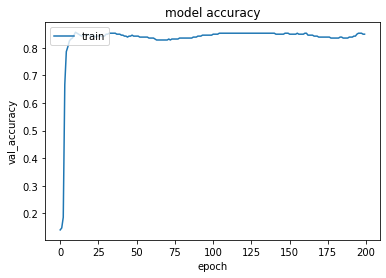

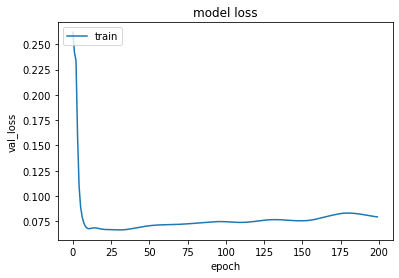

In [ ]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Modelo final
Entrenamiento final sin validation

In [ ]:
# DEFINIR Y ENTRENAR EL MODELO DEFINITIVO, CON LOS MEJORES HIPERPARÁMETROS
# ejemplo:
num_neuronas = 25
lr           = 0.005
momento      = 0
epochs       = 200
class_weight = {
    0: 1.,
    1: 5.,
    2: 10.
}

#definir modelo
final_model = Sequential()
final_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))
final_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))
final_model.add(Dense(num_clases, activation='softmax'))


#COMPILAR
final_model.compile( 
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse', 'binary_crossentropy']
)

#ENTRENAR
historico=final_model.fit(
    X_train, y_train_transformed, epochs=epochs, 
    batch_size=1, verbose=1, validation_split=0, shuffle=False, class_weight=class_weight
)

Epoch 1/200
1424/1424 [==============================] - 3s 2ms/step - loss: 0.5247 - accuracy: 0.4459 - mse: 0.2081 - binary_crossentropy: 0.6139
Epoch 2/200
1424/1424 [==============================] - 3s 2ms/step - loss: 0.5146 - accuracy: 0.3490 - mse: 0.2214 - binary_crossentropy: 0.6378
Epoch 3/200
1424/1424 [==============================] - 2s 2ms/step - loss: 0.5135 - accuracy: 0.3497 - mse: 0.2211 - binary_crossentropy: 0.6374
Epoch 4/200
1424/1424 [==============================] - 2s 2ms/step - loss: 0.5123 - accuracy: 0.3532 - mse: 0.2208 - binary_crossentropy: 0.6368
Epoch 5/200
1424/1424 [==============================] - 2s 2ms/step - loss: 0.5111 - accuracy: 0.3567 - mse: 0.2205 - binary_crossentropy: 0.6363
Epoch 6/200
1424/1424 [==============================] - 2s 2ms/step - loss: 0.5098 - accuracy: 0.3638 - mse: 0.2202 - binary_crossentropy: 0.6357
Epoch 7/200
1424/1424 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.3659 - mse: 0.2198 -

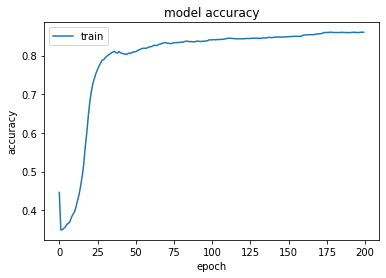

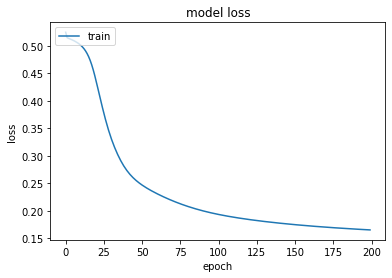

In [ ]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(historico.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# EVALUAR MODELO 
train_results = final_model.evaluate(X_train, y_train_transformed, verbose=1)
test_results = final_model.evaluate(X_test, y_test_transformed, verbose=1)

#EL INDICE 0 ES EL LOSS, EL RESTO LAS MÉTRICAS DEFINADAS ARRIBA. EN ESTE CASO 'accuracy':1,'mse':2 
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]} - MSE: {train_results[2]} ')
print(f'Test results  - Loss: {test_results[0]}  - Accuracy: {test_results[1]} - MSE: {test_results[2]} ')

22/22 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.8077 - mse: 0.0900 - binary_crossentropy: 0.4146
Train results - Loss: 0.0836401879787445 - Accuracy: 0.8356741666793823 - MSE: 0.0836401879787445 
Test results  - Loss: 0.08997735381126404  - Accuracy: 0.807692289352417 - MSE: 0.08997735381126404 


In [ ]:
# PREDICCIONES EN BRUTO
raw_testPred = final_model.predict(X_test)
fichero_prediccion = []
for x in raw_testPred:
        fichero_prediccion.append(x)
pd.DataFrame(fichero_prediccion).to_csv(path+'fichero_prediccion.txt', index=False, header=None) 
#prediccion de los 5 primeros patrones de test: 5 vectores con valores reales 
print(raw_testPred[:5])

# PREDICCIONES DE LAS CLASES
testPred = np.argmax(raw_testPred, axis=1)
#transformar el núm de col en la etiqueta
class_testPred = encoder.classes_[testPred]
print(class_testPred[:5])
fichero_prediccion2 = []
for x in class_testPred:
        fichero_prediccion2.append(x)
pd.DataFrame(fichero_prediccion2).to_csv(path+'fichero_prediccion_clases.txt', index=False, header=None) 

#MATRIZ DE CONFUSIÓN Y OTRAS MÉTRICAS COMO RECALL
cm=confusion_matrix(y_test, class_testPred)
print('Matriz de confusión:')
print(cm)
print('------------------------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, class_testPred))

22/22 [==============================] - 0s 1ms/step
[[8.7325037e-01 1.0569141e-01 2.1058151e-02]
 [9.8860729e-01 1.1376358e-02 1.6315978e-05]
 [9.5660084e-01 4.3344501e-02 5.4609060e-05]
 [9.2387509e-01 7.5374775e-02 7.5018842e-04]
 [8.6095250e-01 1.3896762e-01 7.9835321e-05]]
[1. 1. 1. 1. 1.]
Matriz de confusión:
[[443  83  21]
 [  4  72  21]
 [  0   6  52]]
------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89       547
         2.0       0.45      0.74      0.56        97
         3.0       0.55      0.90      0.68        58

    accuracy                           0.81       702
   macro avg       0.66      0.82      0.71       702
weighted avg       0.88      0.81      0.83       702

